In [10]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
image_size = (128, 128)  
batch_size = 32         
data_dir = './imgs' 

In [12]:
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

In [13]:
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 16009 images belonging to 26 classes.


In [14]:
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3991 images belonging to 26 classes.


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 56s 110ms/step - accuracy: 0.1392 - loss: 2.6678 - val_accuracy: 0.3916 - val_loss: 1.4423
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 73us/step - accuracy: 0.4375 - loss: 1.4506 - val_accuracy: 0.3478 - val_loss: 1.3832
Epoch 3/10


2024-06-04 13:29:38.470195: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-06-04 13:29:38.498388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 55s 110ms/step - accuracy: 0.4522 - loss: 1.3216 - val_accuracy: 0.5504 - val_loss: 1.1472
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 64us/step - accuracy: 0.5312 - loss: 0.9444 - val_accuracy: 0.6957 - val_loss: 1.2733
Epoch 5/10


2024-06-04 13:30:33.825031: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-04 13:30:33.851625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 57s 114ms/step - accuracy: 0.5940 - loss: 0.9881 - val_accuracy: 0.6666 - val_loss: 0.8368
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 58us/step - accuracy: 0.7500 - loss: 0.6947 - val_accuracy: 0.7391 - val_loss: 0.8013
Epoch 7/10


2024-06-04 13:31:30.988440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-04 13:31:31.013652: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 56s 112ms/step - accuracy: 0.6614 - loss: 0.8141 - val_accuracy: 0.6764 - val_loss: 0.7659
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 57us/step - accuracy: 0.6875 - loss: 0.5456 - val_accuracy: 0.6522 - val_loss: 1.0855
Epoch 9/10


2024-06-04 13:32:27.103883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-04 13:32:27.128474: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


500/500 ━━━━━━━━━━━━━━━━━━━━ 56s 111ms/step - accuracy: 0.6891 - loss: 0.7423 - val_accuracy: 0.6978 - val_loss: 0.7060
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 54us/step - accuracy: 0.7188 - loss: 0.6418 - val_accuracy: 0.6957 - val_loss: 0.5689


2024-06-04 13:33:22.868948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-04 13:33:22.891958: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [18]:
history

In [19]:
model.compute_loss

<bound method Trainer.compute_loss of <Sequential name=sequential_1, built=True>>

In [20]:
model.save('./modelo_redes.h5')


Text(0.5, 0, 'Steps')

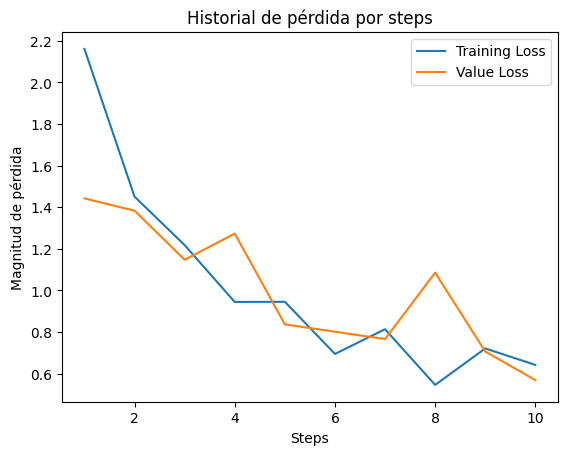

In [41]:
loss_values = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, val_loss, label='Value Loss')
plt.legend()
plt.title('Historial de pérdida por steps')
plt.ylabel('Magnitud de pérdida')
plt.xlabel('Steps')

Text(0.5, 0, 'Steps')

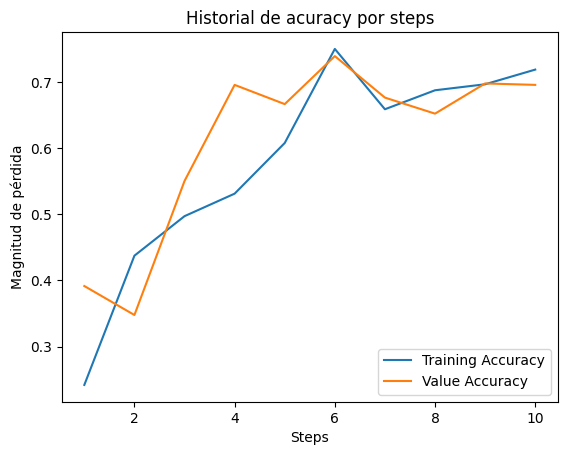

In [42]:
loss_values = history.history["accuracy"]
val_loss = history.history["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, label='Training Accuracy')
plt.plot(epochs, val_loss, label='Value Accuracy')
plt.legend()
plt.title('Historial de acuracy por steps')
plt.ylabel('Magnitud de pérdida')
plt.xlabel('Steps')